In [2]:
import os, sys, glob
os.environ['R_HOME'] = sys.exec_prefix + '/lib/R/'
import numpy as np
import scanpy as sc
import scFates as scf

In [10]:
fn = glob.glob('../*/*/*/GSE201257_adata_processed.h5ad')[0]
adata = sc.read_h5ad(fn)

In [11]:
adata

AnnData object with n_obs × n_vars = 8842 × 21676
    obs: 'plates', 'devtime', 'location', 'n_genes_by_counts', 'total_counts', 'total_counts_ERCC', 'pct_counts_ERCC', 'doublet_scores', 'leiden', 'CytoTRACE', 'Gut_neuron', 'Sensory', 'Symp', 'enFib', 'ChC', 'Gut_glia', 'NCC', 'Mesenchyme', 'Melanocytes', 'SatGlia', 'SC', 'BCC', 'conflict', 'assignments', 'Hub', 'Hub_leiden', 'celltype'
    var: 'ERCC', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'n_cells', 'm', 'v', 'n_obs', 'res', 'lp', 'lpa', 'qv', 'highly_variable'
    uns: 'Hub_colors', 'assignments_colors', 'celltype_colors', 'devtime_colors', 'leiden', 'leiden_colors', 'leiden_sizes', 'location_colors', 'log1p', 'neighbors', 'paga', 'umap'
    obsm: 'X_diff', 'X_pca', 'X_umap'
    layers: 'palantir_imp', 'scaled'
    obsp: 'connectivities', 'distances'

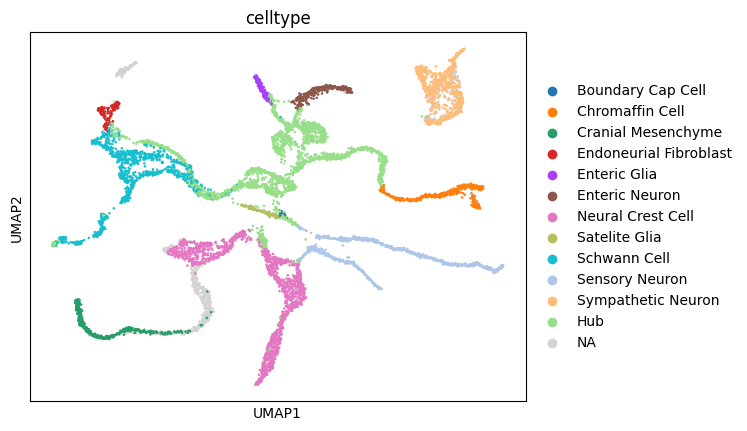

In [12]:
sc.pl.umap(adata, color = 'celltype')

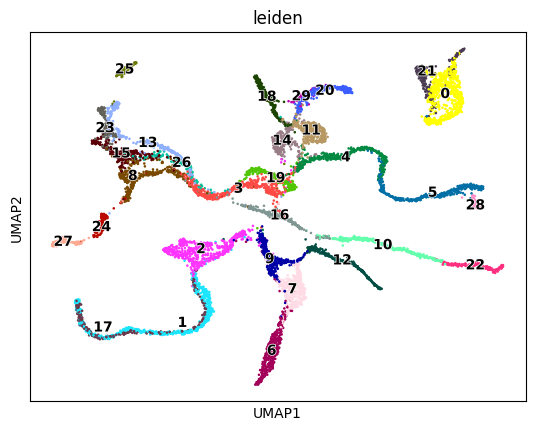

In [13]:
sc.pl.umap(adata, color = 'leiden', legend_loc = 'on data', legend_fontoutline = True)

In [14]:
keep = np.array([2, 1, 17], dtype = str)
adata = adata[adata.obs.leiden.isin(keep) & (adata.obs.celltype != 'Hub')]

In [15]:
adata

View of AnnData object with n_obs × n_vars = 1456 × 21676
    obs: 'plates', 'devtime', 'location', 'n_genes_by_counts', 'total_counts', 'total_counts_ERCC', 'pct_counts_ERCC', 'doublet_scores', 'leiden', 'CytoTRACE', 'Gut_neuron', 'Sensory', 'Symp', 'enFib', 'ChC', 'Gut_glia', 'NCC', 'Mesenchyme', 'Melanocytes', 'SatGlia', 'SC', 'BCC', 'conflict', 'assignments', 'Hub', 'Hub_leiden', 'celltype'
    var: 'ERCC', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'n_cells', 'm', 'v', 'n_obs', 'res', 'lp', 'lpa', 'qv', 'highly_variable'
    uns: 'Hub_colors', 'assignments_colors', 'celltype_colors', 'devtime_colors', 'leiden', 'leiden_colors', 'leiden_sizes', 'location_colors', 'log1p', 'neighbors', 'paga', 'umap'
    obsm: 'X_diff', 'X_pca', 'X_umap'
    layers: 'palantir_imp', 'scaled'
    obsp: 'connectivities', 'distances'

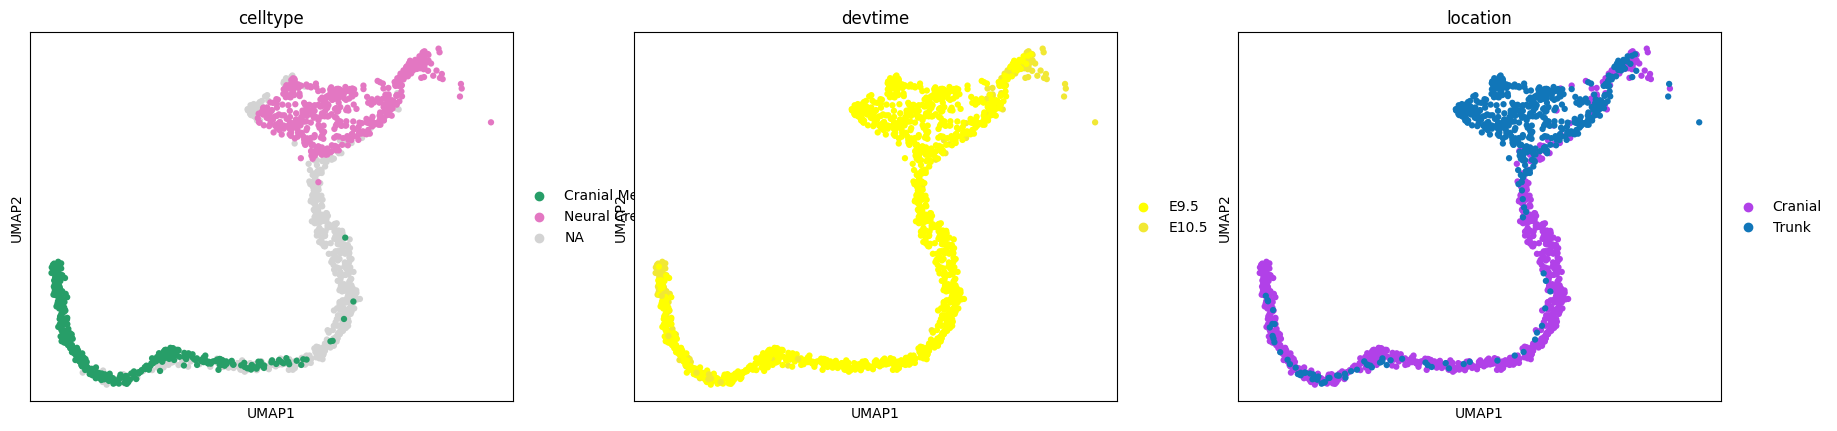

In [16]:
sc.pl.umap(adata, color = ['celltype', 'devtime', 'location'])

inferring a principal tree --> parameters used 
    40 principal points, sigma = 0.1, lambda = 100, metric = euclidean
    fitting:  56%|█████▌    | 28/50 [00:00<00:00, 62.00it/s]
    converged
    finished (0:00:00) 

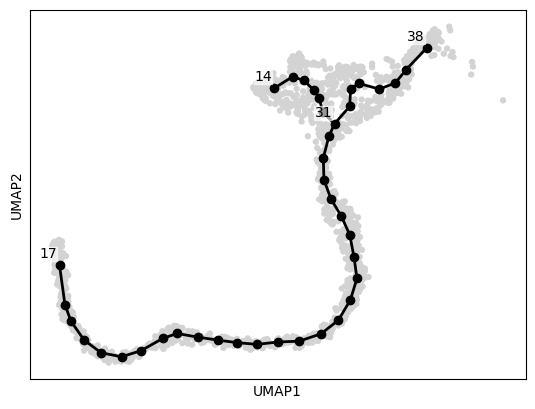

--> added 
    .uns['ppt'], dictionnary containing inferred tree.
    .obsm['X_R'] soft assignment of cells to principal points.
    .uns['graph']['B'] adjacency matrix of the principal points.
    .uns['graph']['F'] coordinates of principal points in representation space.


In [29]:
scf.tl.tree(adata, Nodes = 40, ppt_lambda = 100, use_rep = 'X_umap', plot = True, basis = 'umap')

In [30]:
scf.tl.root(adata, 14)

node 14 selected as a root --> added
    .uns['graph']['root'] selected root.
    .uns['graph']['pp_info'] for each PP, its distance vs root and segment assignment.
    .uns['graph']['pp_seg'] segments network information.


In [31]:
scf.tl.pseudotime(adata)

projecting cells onto the principal graph
    finished (0:00:01) --> added
    .obs['edge'] assigned edge.
    .obs['t'] pseudotime value.
    .obs['seg'] segment of the tree assigned.
    .obs['milestones'] milestone assigned.
    .uns['pseudotime_list'] list of cell projection from all mappings.


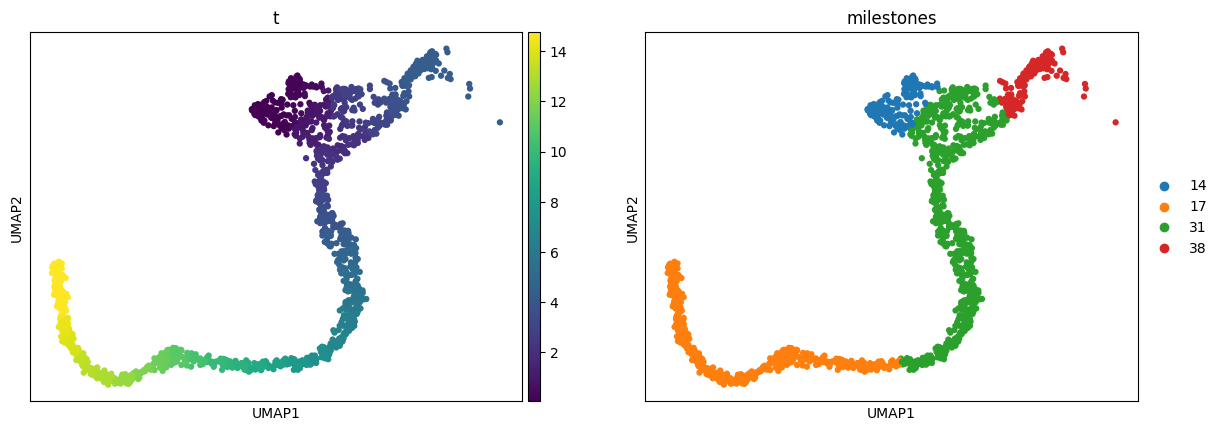

In [32]:
sc.pl.umap(adata, color = ['t', 'milestones'])

/home/caleb/miniconda3/envs/scFates/lib/python3.11/site-packages/anndata/_core/anndata.py:381: FutureWarning: The dtype argument is deprecated and will be removed in late 2024.
  warnings.warn(


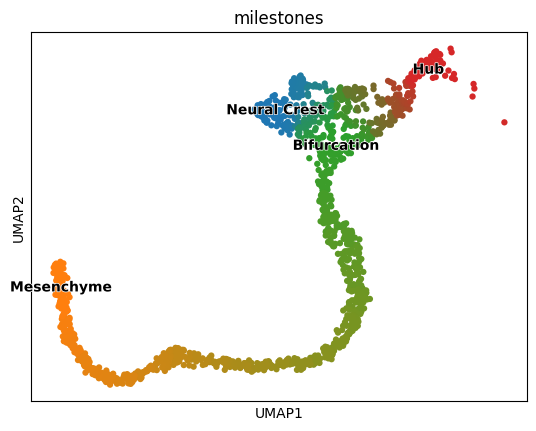

In [ ]:
milestones_dict = {
    '14' : 'Neural Crest',
    '17' : 'Mesenchyme',
    '31' : 'Bifurcation',
    '38' : 'Hub'
    }
scf.tl.rename_milestones(adata, new = milestones_dict)
scf.pl.milestones(adata, basis = 'umap', annotate = True)

In [34]:
scf.tl.subset_tree(adata, 'Neural Crest', ['Mesenchyme'])

subsetting tree


/home/caleb/miniconda3/envs/scFates/lib/python3.11/site-packages/scFates/tools/graph_operations.py:294: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32]' has dtype incompatible with bool, please explicitly cast to a compatible dtype first.
  nodes.loc[nodes] = np.arange(nodes.sum())


node 12 selected as a root --> added
    .uns['graph']['root'] selected root.
    .uns['graph']['pp_info'] for each PP, its distance vs root and segment assignment.
    .uns['graph']['pp_seg'] segments network information.
projecting cells onto the principal graph
    finished (0:00:01) --> added
    .obs['edge'] assigned edge.
    .obs['t'] pseudotime value.
    .obs['seg'] segment of the tree assigned.
    .obs['milestones'] milestone assigned.
    .uns['pseudotime_list'] list of cell projection from all mappings.
    finished (0:00:00) --> tree extracted
--> added 
    .obs['old_milestones'], previous milestones from intial tree


/home/caleb/miniconda3/envs/scFates/lib/python3.11/site-packages/anndata/_core/anndata.py:381: FutureWarning: The dtype argument is deprecated and will be removed in late 2024.
  warnings.warn(


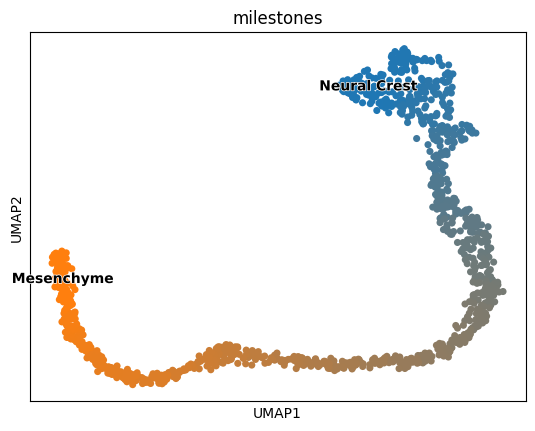

In [35]:
scf.pl.milestones(adata, basis = 'umap', annotate = True)

In [36]:
scf.tl.test_association(adata, n_jobs = 8)


test features for association with the trajectory
    single mapping : 100%|██████████| 21676/21676 [03:44<00:00, 96.53it/s]
    found 184 significant features (0:03:44) --> added
    .var['p_val'] values from statistical test.
    .var['fdr'] corrected values from multiple testing.
    .var['st'] proportion of mapping in which feature is significant.
    .var['A'] amplitue of change of tested feature.
    .var['signi'] feature is significantly changing along pseudotime.
    .uns['stat_assoc_list'] list of fitted features on the graph for all mappings.


In [37]:
scf.tl.fit(adata, n_jobs = 8)

fit features associated with the trajectory
    single mapping : 100%|██████████| 184/184 [00:03<00:00, 51.91it/s]
    finished (adata subsetted to keep only fitted features!) (0:00:03) --> added
    .layers['fitted'], fitted features on the trajectory for all mappings.
    .raw, unfiltered data.


Clustering features using fitted layer
    finished (0:00:00) --> added 
    .var['clusters'] identified modules.
Cluster 0: 106 Genes
Cluster 1: 78 Genes


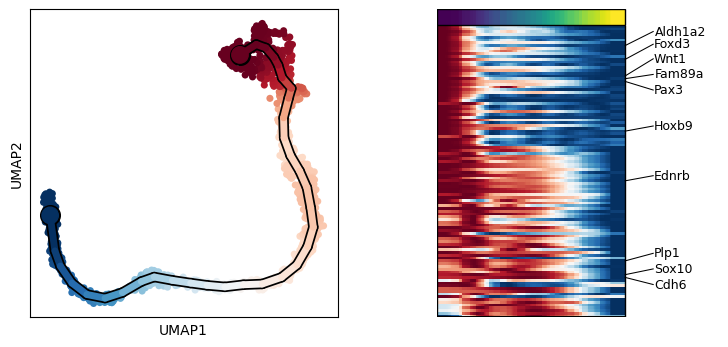

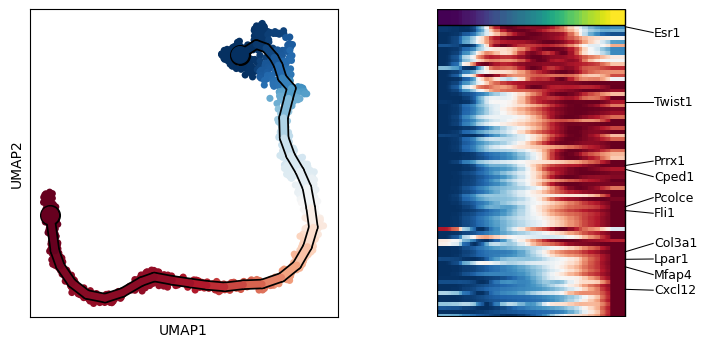

In [42]:
scf.tl.cluster(adata, resolution = .1)
for clus in sorted(adata.var.clusters.unique()):
    clus_msk = (adata.var.clusters == clus)
    clus_features = adata.var_names[clus_msk]
    print(f'Cluster {clus}: {clus_features.size} Genes')
    scf.pl.trends(adata, features = clus_features, basis = 'umap')

early: 106 Genes
late: 78 Genes


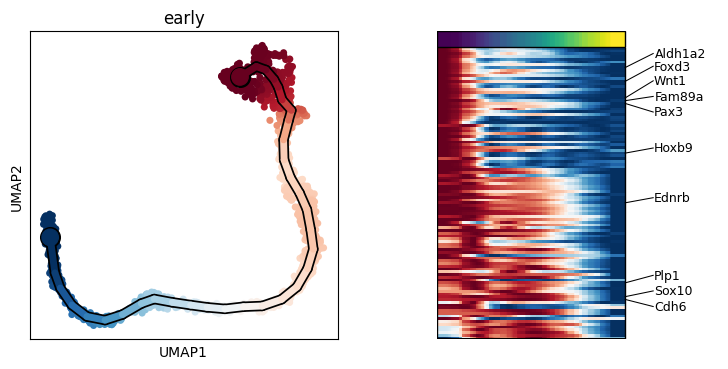

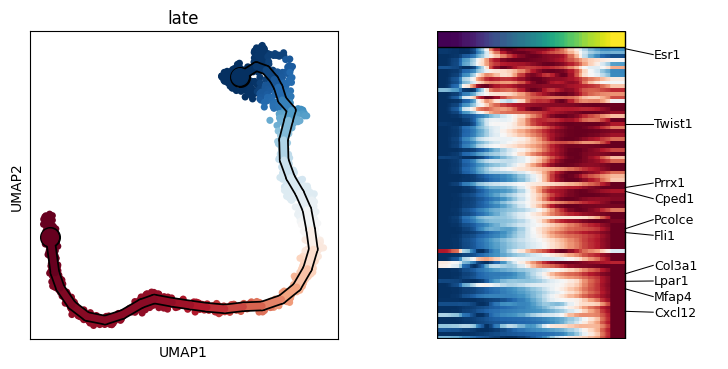

In [43]:
adata.var['signature'] = adata.var.clusters.map({'0' : 'early', '1' : 'late'}).astype('category')
os.mkdir('results/GSE201257')
for clus in adata.var.signature.unique():
    clus_msk = (adata.var.signature == clus)
    clus_features = adata.var_names[clus_msk]
    print(f'{clus}: {clus_features.size} Genes')
    scf.pl.trends(adata, features = clus_features, basis = 'umap', title = clus)
    np.savetxt(f'results/GSE201257/{clus}.txt', clus_features, fmt = '%s')